In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb

import pickle

%matplotlib inline

In [3]:
df_csv = pd.read_csv('Employee.csv')

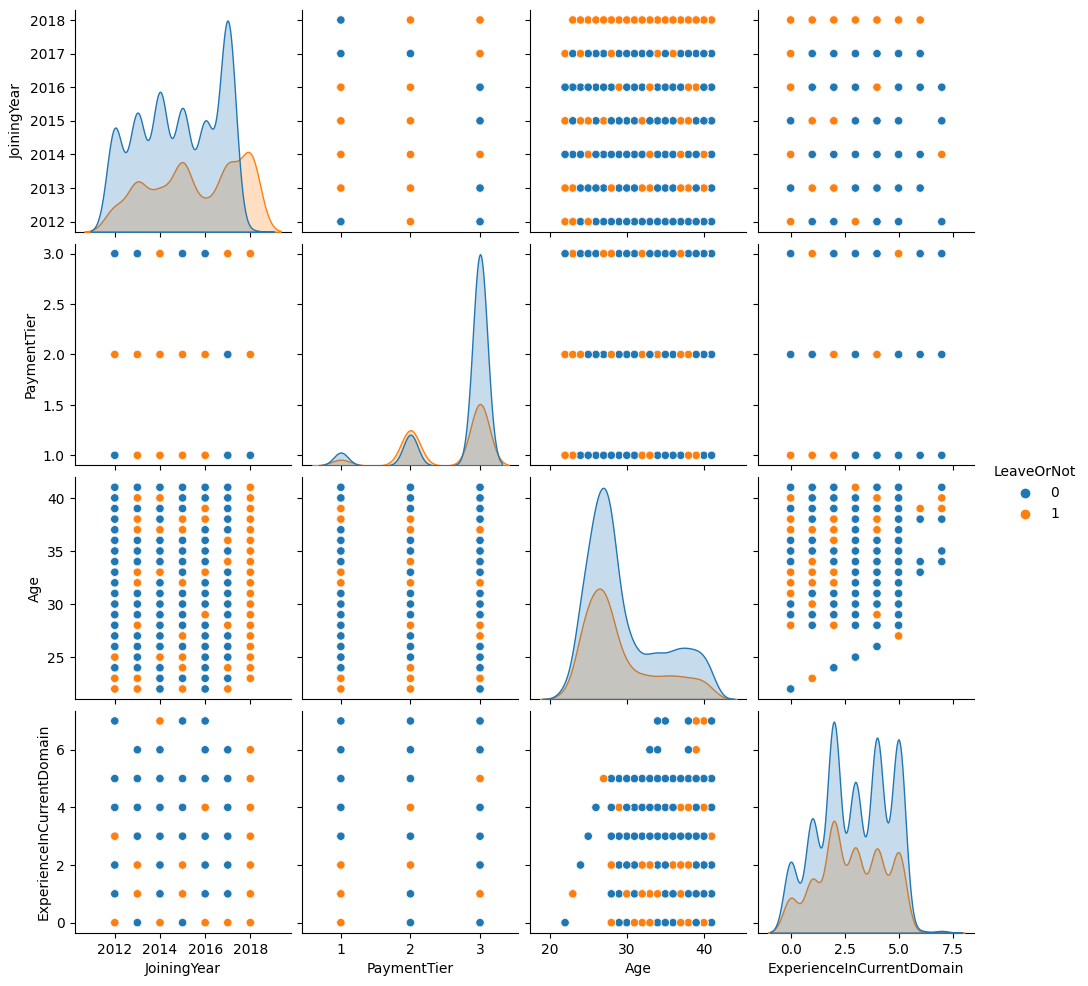

In [4]:
# data analysis
sns.pairplot(df_csv, hue='LeaveOrNot')

<AxesSubplot:>

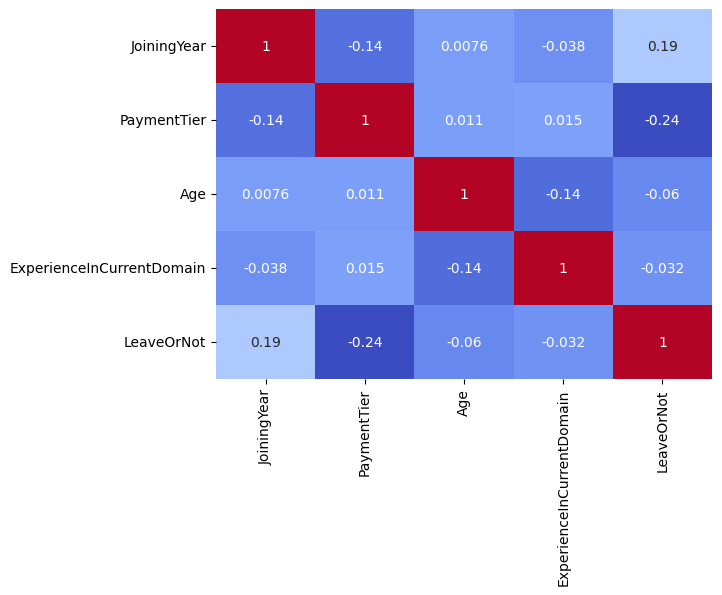

In [5]:
# features correlations
sns.heatmap(df_csv.corr(method='spearman'), annot=True, cmap='coolwarm',cbar=False)

In [6]:
# create train set , validation set and test set
df_full_train, df_test = train_test_split(df_csv, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train['LeaveOrNot']
y_val = df_val['LeaveOrNot']
y_test = df_test['LeaveOrNot']

In [9]:
del df_train['LeaveOrNot']
del df_val['LeaveOrNot']
del df_test['LeaveOrNot']

In [10]:
# enconding with DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [11]:
# params definitions
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create model RandomForestClassifier
model = RandomForestClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# best params and best score
rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_

# best model
rf_final_model = grid_search.best_estimator_
rf_test_score = rf_final_model.score(X_test, y_test)

# results
print("Meilleurs paramètres:", rf_best_params)
print("Meilleur score:", rf_best_score)
print("Score sur l'ensemble de test:", rf_test_score)


Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur score: 0.8473676111335526
Score sur l'ensemble de test: 0.8592910848549946


In [12]:
with open('rf_model.bin', 'wb') as f:
    pickle.dump(rf_final_model, f)

In [14]:
# DMatrix create
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [18]:
from sklearn.model_selection import GridSearchCV

# params definition
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 50, 100, 200]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# best params and best score
xgb_best_params = grid_search.best_params_
xgb_best_score = grid_search.best_score_
xgb_final_model = grid_search.best_estimator_

# results
print("Meilleurs paramètres:", xgb_best_params)
print("Meilleur score:", xgb_best_score)

TypeError: Singleton array array(<xgboost.core.DMatrix object at 0x000001D5A34E9AE0>, dtype=object) cannot be considered a valid collection.

In [16]:
with open('xgb_model.bin', 'wb') as f:
    pickle.dump(xgb_final_model, f)

In [17]:
X_test

array([[2.500e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 2.013e+03,
        3.000e+00],
       [2.500e+01, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.013e+03,
        2.000e+00],
       [3.800e+01, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.014e+03,
        3.000e+00],
       ...,
       [2.500e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.013e+03,
        1.000e+00],
       [3.000e+01, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.013e+03,
        1.000e+00],
       [2.500e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 2.014e+03,
        3.000e+00]])